In [1]:
#150を超える色空間があるってマジか
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

#やばす
#ノート
#opencvはHSVのレンジが、Hが0-179, Sが0-255, Vが0-255なので
#値を他のソフトウェア処理と比べるときは正規化すべし

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

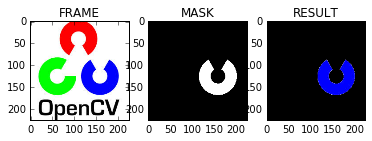

In [2]:
#チュートリはビデオでやってるけど、今回は画像でopencvのlogoを使ってやってみる
#cap = cv2.VideoCapture(0)
#while(1):
#    _, frame = cap.read()
frame = cv2.imread('./images/opencv.jpg')

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #hsvに変換
    
# H 110deg-130deg, S 50-255, V 50-255の範囲を指定して二値化 
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
res = cv2.bitwise_and(frame, frame, mask= mask) #マスクを合成して結果画像生成
    
mpltFrame = cv2.merge((frame[:, :, 2], frame[:, :, 1], frame[:, :, 0]))
mpltMask = mask
mpltRes = cv2.merge((res[:, :, 2], res[:, :, 1], res[:,:,0]))
plt.subplot(131), plt.imshow(mpltFrame, 'gray'), plt.title('FRAME')
plt.subplot(132), plt.imshow(mpltMask, 'gray'), plt.title('MASK')
plt.subplot(133), plt.imshow(mpltRes, 'gray'), plt.title('RESULT')
plt.show()
#ノート
#一番シンプルなオブジェクト追跡の方法がこれで、あとはcontour関数の使い方がわかれば
#重心を見つけて物体追跡とかできるし、軌跡を表示したりもできるので幸せになれるよ

In [3]:
#どうやってHSVの値を知ればよいのか、stackoverflowによくあるのが
#画像じゃなくてBGR値をcvtColorに渡すとよいというもの
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]
